## Práctica. 

### Construir la siguiente red de perceptrones para identificar números de una matriz de 5x3 pixeles representados por 0s y 1s


<img src="figs/fig-num_perceptron.png" width="80%">

### Datos de entrada: X
####  Cada fila representa un número entre 0 y 9 codificado en bits en una 'matriz' de 5x3

### Datos de Salida: T
####  Cada fila representa un número entre 0 y 9 codificado en forma binaria.

In [2]:
import numpy as np

# Datos de entrada (cada fila representa un número en bits)
X = np.array([
    [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
])

# Salida deseada de la red neuronal: números codificados en binario
T = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1]
])

### Visualización de los datos para la comprensión del dominio

[1 1 1 1 0 1 1 1 1 0 0 1 0 0 1]
[[143 143 143]
 [143   0 143]
 [143 143 143]
 [  0   0 143]
 [  0   0 143]]


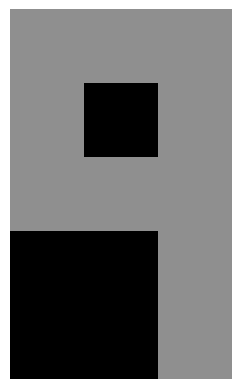

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir la matriz numpy a una imagen
# Visualización del  numero N
N=9
numero = X[N]   
print(numero)
bit_image = np.array( numero, dtype=np.uint8).reshape(5,3)  
bit_image = bit_image  * 143 # Multiplicamos por 143 para convertir a escala de grises
print(bit_image)
plt.imshow(bit_image, cmap='gray',  vmin=0, vmax=255)
plt.axis('off')  # Ocultar los ejes
# plt.savefig("test.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

### La función de activación será la función escalón $ f(x) $, se define como sigue:

$$
f(x) = 
\begin{cases} 
1 & \text{si } x \geq 0 \\
0 & \text{si } x < 0 
\end{cases}
$$


## Instrucciones:
### - Implementar la red de perceptrones como se muestra en la figura anterior. 
### - En la clase `PerceptronTODO`, se proporciona un esquema general de la red de perceptrones.
### - Completar lo indicado en la clase para construir una clasificador usando la red de perceptrones mencionado.
### - Aplicar el procedimiento para el entrenamiento del clasificador
### - Haga uso de la regla de aprendizaje del perceptrón para actualización de los pesos.

$$
\Large \Delta w_i \leftarrow  \eta \cdot (t - y ) \cdot x_i \\
$$


$$
\Large w_i \leftarrow w_i + \Delta w_i \\
$$

$$
\Large b \leftarrow b + \eta \cdot (t - y)
$$

### Donde:
- ### $\eta$ representa la tasa de aprendizaje ($learing rate$), en este caso, se usará la constante con valor de 1.
- ### $\Delta w_i$ representa el cambio necesario para ajustar el parámetro $w_i$
- ### $b$ representa el sesgo o $bias$


In [95]:
class PerceptronTODO:
    def __init__(self, input_dim, output_dim, learning_rate=1, epochs=1000, w_zero_start=True, b_zero_start=True):
        # Inicializa las dimensiones de entrada y salida, la tasa de aprendizaje y el número de épocas
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        if w_zero_start:
            self.weights = np.zeros((output_dim, input_dim ))
        else:
            self.weights = np.random.rand(input_dim)
        if b_zero_start:
            self.bias = np.zeros(output_dim)
        else:
            self.bias = np.random.rand() 

    def step_function(self, x):
        # TODO: Implementa la función escalón  
        return np.where(x >= 0, 1, 0)

    def train(self, X, T):

        # Etapa de entrenamiento.
        # X: contiene todo el conjunto de entrenamiento.
        # T: contienen todas las salidas esperadas.

        # Una época indica que pasó por todos los ejemplos de entrenamiento 
        
        for _ in range(self.epochs):
            print("Epoca: ",  _)

            # TODO: Propagación hacia adelante, calcula la entrada neta (z) de las neuronas
            z = X@self.weights.T
        
            # TODO: Calcula la salida aplicando la función escalón como función de activación
            y = self.step_function(z + self.bias)
            
            # TODO: Calcula el error como la diferencia entre la salida deseada T y la salida actual
            err = self.learning_rate * (T - y)
            delta_w = err.T @ X

            # TODO: Actualiza los pesos usando la regla de aprendizaje del perceptrón
            self.weights = self.weights + delta_w

            # TODO: Actualiza el sesgo usando la regla de aprendizaje del perceptrón
            err = np.sum(err, axis=0)
            self.bias = self.bias + err

    def predict(self, X):
        # TODO: Calcula la entrada neta de las neuronas (z) y devuelve la predicción aplicando la función de activación
        return self.step_function((X @ self.weights.T) + self.bias)


In [82]:
epochs = 10
W = np.zeros((4, X.shape[1]))
B = np.zeros(4)

for _ in range(epochs):
    print("Epoca: ",  _)
    z = X@W.T
    y = np.where(z + B >= 0, 1, 0)
    err = (T - y)
    delta_w = err.T @ X
    W = W + delta_w
    err = np.sum(err, axis=0)
    B = B + err

Epoca:  0
Epoca:  1
Epoca:  2
Epoca:  3
Epoca:  4
Epoca:  5
Epoca:  6
Epoca:  7
Epoca:  8
Epoca:  9


### Ejemplo de uso para el entrenamiento  de la clase PerceptronTODO

In [96]:
# Crear y entrenar el perceptrón
#Dimensines de entrada
dim_entrada = X.shape[1]
dim_salida = T.shape[1]
perceptron = PerceptronTODO(input_dim=dim_entrada, output_dim=dim_salida, learning_rate=1, epochs=1000)

# Entrenar el modelo
# Encuentra los valores óptimos para los parámetros (pesos y bias):  W y B
perceptron.train(X, T)

print(perceptron.predict(X[4]))

Epoca:  0
Epoca:  1
Epoca:  2
Epoca:  3
Epoca:  4
Epoca:  5
Epoca:  6
Epoca:  7
Epoca:  8
Epoca:  9
Epoca:  10
Epoca:  11
Epoca:  12
Epoca:  13
Epoca:  14
Epoca:  15
Epoca:  16
Epoca:  17
Epoca:  18
Epoca:  19
Epoca:  20
Epoca:  21
Epoca:  22
Epoca:  23
Epoca:  24
Epoca:  25
Epoca:  26
Epoca:  27
Epoca:  28
Epoca:  29
Epoca:  30
Epoca:  31
Epoca:  32
Epoca:  33
Epoca:  34
Epoca:  35
Epoca:  36
Epoca:  37
Epoca:  38
Epoca:  39
Epoca:  40
Epoca:  41
Epoca:  42
Epoca:  43
Epoca:  44
Epoca:  45
Epoca:  46
Epoca:  47
Epoca:  48
Epoca:  49
Epoca:  50
Epoca:  51
Epoca:  52
Epoca:  53
Epoca:  54
Epoca:  55
Epoca:  56
Epoca:  57
Epoca:  58
Epoca:  59
Epoca:  60
Epoca:  61
Epoca:  62
Epoca:  63
Epoca:  64
Epoca:  65
Epoca:  66
Epoca:  67
Epoca:  68
Epoca:  69
Epoca:  70
Epoca:  71
Epoca:  72
Epoca:  73
Epoca:  74
Epoca:  75
Epoca:  76
Epoca:  77
Epoca:  78
Epoca:  79
Epoca:  80
Epoca:  81
Epoca:  82
Epoca:  83
Epoca:  84
Epoca:  85
Epoca:  86
Epoca:  87
Epoca:  88
Epoca:  89
Epoca:  90
Epoca:  9

### Ejemplo de la etapa de predicción de nuevos datos


In [ ]:
# Realizar predicciones
n8 = np.array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]) #8

predictions = perceptron.predict(n8)

# Imprimir las predicciones
print("Predicciones:")
print(predictions)

## Ejercicio extra: Graficar el error de la etapa de entrenamiento.

### - El eje x indicaría la época.

### - El eje y indicaría el error.

### - El error se puede calcular por medio del Error Cuadrático Medio (MSE) o el Error Absoluto Medio (MAE). Básicamente se calculan los errores de todos los ejemplos de entrenamiento para una época y se promedian. Estos se acumulan en un error general para graficarlos posteriormente al finalizar el entrenamiento. 

### - Graficar las dos medidas en gráficos independientes.


</br>
</br>

## 1. Error Cuadrático Medio (MSE - *Mean Squared Error*)



### El Error Cuadrático Medio mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. La fórmula es:

$$
\Large \text{MSE} = \frac{1}{n} \sum_{i=1}^n (t_i - y_i)^2
$$

### Donde:
- ### $ n $ es el número total de muestras o ejemplos de entrenamiento.
- ### $ t_i $ es el valor real para la muestra $ i $.
- ### $ y_i $ es el valor predicho para la muestra $ i $.

</br>

## Para múltiples salidas:

$$
\Large \text{MSE} = \frac{1}{n \cdot m} \sum_{i=1}^{n} \sum_{j=1}^{m} (t_{ij} - {y}_{ij})^2
$$

### donde:
- ### $n$: número de muestras o patrones
- ### $m$: número de salidas
- ### $t_{ij}$: valor real de la salida $j$ para la muestra $i$
- ### ${y}_{ij}$: valor predicho de la salida $j$ para la muestra $i$

</br>
</br>

## 2. Error Absoluto Medio (MAE- *Mean Absolute Error* )

###  El Error Absoluto Medio mide el promedio de los errores absolutos entre las predicciones del modelo y los valores reales. Es menos sensible a los valores atípicos en comparación con el MSE. La fórmula es:

$$
\Large \text{MAE} = \frac{1}{n} \sum_{i=1}^n |t_i - y_i|
$$

### Donde:
- ### $ n $ es el número total de muestras o ejemplos de entrenamiento.
- ### $ t_i $ es el valor real para la muestra $ i $.
- ### $ y_i $ es el valor predicho para la muestra $ i $.
- ### $|\cdot|$: valor absoluto


</br>

## Para múltiples salidas:

$$
\Large \text{MAE} = \frac{1}{n \cdot m} \sum_{i=1}^{n} \sum_{j=1}^{m} |t_{ij} - {y}_{ij}|
$$

### donde:
- ### $n$: número de muestras o patrones
- ### $m$: número de salidas
- ### $t_{ij}$: valor real de la salida $j$ para la muestra $i$
- ### ${y}_{ij}$: valor predicho de la salida $j$ para la muestra $i$
- ### $|\cdot|$: valor absoluto

</br>
</br>

## Diferencias Clave:

- ### **MSE** penaliza más los errores grandes debido a la elevación al cuadrado de las diferencias. Esto puede hacer que el modelo se enfoque en minimizar errores grandes, pero puede ser más sensible a los valores atípicos.

- ### **MAE** da una medida más robusta de los errores, ya que no eleva al cuadrado las diferencias, por lo que es menos sensible a los valores atípicos.